In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from datetime import datetime

In [3]:
df = pd.read_csv("airquality.csv")

In [4]:
df

Unnamed: 0     No  year  month  day  hour  PM2.5  PM10  SO2  NO2  \
0               0      1  2013      3    1     0    4.0   4.0  3.0  NaN   
1               1      2  2013      3    1     1    7.0   7.0  3.0  NaN   
2               2      3  2013      3    1     2    5.0   5.0  3.0  2.0   
3               3      4  2013      3    1     3    6.0   6.0  3.0  NaN   
4               4      5  2013      3    1     4    5.0   5.0  3.0  NaN   
...           ...    ...   ...    ...  ...   ...    ...   ...  ...  ...   
35059       35059  35060  2017      2   28    19   11.0  11.0  2.0  2.0   
35060       35060  35061  2017      2   28    20   13.0  13.0  2.0  2.0   
35061       35061  35062  2017      2   28    21    9.0  14.0  2.0  2.0   
35062       35062  35063  2017      2   28    22   10.0  12.0  2.0  2.0   
35063       35063  35064  2017      2   28    23   13.0  16.0  4.0  9.0   

          CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      200.0   82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1      200.0   80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2      200.0   79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3      200.0   79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4      200.0   81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...      ...    ...   ...     ...   ...   ...  ...   ...       ...  
35059  200.0   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
35060  200.0  101.0  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
35061  200.0  102.0   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
35062  200.0   97.0   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
35063  500.0   74.0   7.0  1009.4 -12.2   0.0    N   1.9  Dingling  

[35064 rows x 19 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   year        35064 non-null  int64  
 3   month       35064 non-null  int64  
 4   day         35064 non-null  int64  
 5   hour        35064 non-null  int64  
 6   PM2.5       34285 non-null  float64
 7   PM10        34408 non-null  float64
 8   SO2         34334 non-null  float64
 9   NO2         33830 non-null  float64
 10  CO          33052 non-null  float64
 11  O3          33850 non-null  float64
 12  TEMP        35011 non-null  float64
 13  PRES        35014 non-null  float64
 14  DEWP        35011 non-null  float64
 15  RAIN        35013 non-null  float64
 16  wd          34924 non-null  object 
 17  WSPM        35021 non-null  float64
 18  station     35064 non-null  object 
dtypes: float64(11), int64(6),

# Univaraite 

#### Adding a proper time column 

In [19]:
def to_time(x):
    return datetime.strptime(x, "%Y %m %d %H")

In [24]:
aq_df = pd.read_csv("airquality.csv", parse_dates = [["year", "month", "day", "hour"]],
                   date_parser = to_time, keep_date_col = True)

In [25]:
aq_df

year_month_day_hour  Unnamed: 0     No  year month day hour  PM2.5  \
0     2013-03-01 00:00:00           0      1  2013     3   1    0    4.0   
1     2013-03-01 01:00:00           1      2  2013     3   1    1    7.0   
2     2013-03-01 02:00:00           2      3  2013     3   1    2    5.0   
3     2013-03-01 03:00:00           3      4  2013     3   1    3    6.0   
4     2013-03-01 04:00:00           4      5  2013     3   1    4    5.0   
...                   ...         ...    ...   ...   ...  ..  ...    ...   
35059 2017-02-28 19:00:00       35059  35060  2017     2  28   19   11.0   
35060 2017-02-28 20:00:00       35060  35061  2017     2  28   20   13.0   
35061 2017-02-28 21:00:00       35061  35062  2017     2  28   21    9.0   
35062 2017-02-28 22:00:00       35062  35063  2017     2  28   22   10.0   
35063 2017-02-28 23:00:00       35063  35064  2017     2  28   23   13.0   

       PM10  SO2  NO2     CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
0       4.0  3.0  NaN  200.0   82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
1       7.0  3.0  NaN  200.0   80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2       5.0  3.0  2.0  200.0   79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
3       6.0  3.0  NaN  200.0   79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
4       5.0  3.0  NaN  200.0   81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...     ...  ...  ...    ...    ...   ...     ...   ...   ...  ...   ...   
35059  11.0  2.0  2.0  200.0   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3   
35060  13.0  2.0  2.0  200.0  101.0  10.9  1009.0 -14.0   0.0    N   2.1   
35061  14.0  2.0  2.0  200.0  102.0   9.5  1009.4 -13.0   0.0    N   1.5   
35062  12.0  2.0  2.0  200.0   97.0   7.8  1009.6 -12.6   0.0   NW   1.4   
35063  16.0  4.0  9.0  500.0   74.0   7.0  1009.4 -12.2   0.0    N   1.9   

        station  
0      Dingling  
1      Dingling  
2      Dingling  
3      Dingling  
4      Dingling  
...         ...  
35059  Dingling  
35060  Dingling  
35061  Dingling  
35062  Dingling  
35063  Dingling  

[35064 rows x 20 columns]

In [22]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   Unnamed: 0           35064 non-null  int64         
 2   No                   35064 non-null  int64         
 3   year                 35064 non-null  object        
 4   month                35064 non-null  object        
 5   day                  35064 non-null  object        
 6   hour                 35064 non-null  object        
 7   PM2.5                34285 non-null  float64       
 8   PM10                 34408 non-null  float64       
 9   SO2                  34334 non-null  float64       
 10  NO2                  33830 non-null  float64       
 11  CO                   33052 non-null  float64       
 12  O3                   33850 non-null  float64       
 13  TEMP                 35011 non-

In [26]:
aq_df.index = aq_df["year_month_day_hour"]

In [27]:
aq_df

year_month_day_hour  Unnamed: 0     No  year month day  \
year_month_day_hour                                                          
2013-03-01 00:00:00 2013-03-01 00:00:00           0      1  2013     3   1   
2013-03-01 01:00:00 2013-03-01 01:00:00           1      2  2013     3   1   
2013-03-01 02:00:00 2013-03-01 02:00:00           2      3  2013     3   1   
2013-03-01 03:00:00 2013-03-01 03:00:00           3      4  2013     3   1   
2013-03-01 04:00:00 2013-03-01 04:00:00           4      5  2013     3   1   
...                                 ...         ...    ...   ...   ...  ..   
2017-02-28 19:00:00 2017-02-28 19:00:00       35059  35060  2017     2  28   
2017-02-28 20:00:00 2017-02-28 20:00:00       35060  35061  2017     2  28   
2017-02-28 21:00:00 2017-02-28 21:00:00       35061  35062  2017     2  28   
2017-02-28 22:00:00 2017-02-28 22:00:00       35062  35063  2017     2  28   
2017-02-28 23:00:00 2017-02-28 23:00:00       35063  35064  2017     2  28   

                    hour  PM2.5  PM10  SO2  NO2     CO     O3  TEMP    PRES  \
year_month_day_hour                                                           
2013-03-01 00:00:00    0    4.0   4.0  3.0  NaN  200.0   82.0  -2.3  1020.8   
2013-03-01 01:00:00    1    7.0   7.0  3.0  NaN  200.0   80.0  -2.5  1021.3   
2013-03-01 02:00:00    2    5.0   5.0  3.0  2.0  200.0   79.0  -3.0  1021.3   
2013-03-01 03:00:00    3    6.0   6.0  3.0  NaN  200.0   79.0  -3.6  1021.8   
2013-03-01 04:00:00    4    5.0   5.0  3.0  NaN  200.0   81.0  -3.5  1022.3   
...                  ...    ...   ...  ...  ...    ...    ...   ...     ...   
2017-02-28 19:00:00   19   11.0  11.0  2.0  2.0  200.0   99.0  11.7  1008.9   
2017-02-28 20:00:00   20   13.0  13.0  2.0  2.0  200.0  101.0  10.9  1009.0   
2017-02-28 21:00:00   21    9.0  14.0  2.0  2.0  200.0  102.0   9.5  1009.4   
2017-02-28 22:00:00   22   10.0  12.0  2.0  2.0  200.0   97.0   7.8  1009.6   
2017-02-28 23:00:00   23   13.0  16.0  4.0  9.0  500.0   74.0   7.0  1009.4   

                     DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                   
2013-03-01 00:00:00 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00 -19.4   0.0    N   2.1  Dingling  
...                   ...   ...  ...   ...       ...  
2017-02-28 19:00:00 -13.3   0.0  NNE   1.3  Dingling  
2017-02-28 20:00:00 -14.0   0.0    N   2.1  Dingling  
2017-02-28 21:00:00 -13.0   0.0    N   1.5  Dingling  
2017-02-28 22:00:00 -12.6   0.0   NW   1.4  Dingling  
2017-02-28 23:00:00 -12.2   0.0    N   1.9  Dingling  

[35064 rows x 20 columns]

In [28]:
aq_df.columns

Index(['year_month_day_hour', 'Unnamed: 0', 'No', 'year', 'month', 'day',
       'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES',
       'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [30]:
aq_df = aq_df.drop(["year_month_day_hour","Unnamed: 0", "No"],axis=1)

In [31]:
aq_df

year month day hour  PM2.5  PM10  SO2  NO2     CO     O3  \
year_month_day_hour                                                             
2013-03-01 00:00:00  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   82.0   
2013-03-01 01:00:00  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   80.0   
2013-03-01 02:00:00  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   79.0   
2013-03-01 03:00:00  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   79.0   
2013-03-01 04:00:00  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   81.0   
...                   ...   ...  ..  ...    ...   ...  ...  ...    ...    ...   
2017-02-28 19:00:00  2017     2  28   19   11.0  11.0  2.0  2.0  200.0   99.0   
2017-02-28 20:00:00  2017     2  28   20   13.0  13.0  2.0  2.0  200.0  101.0   
2017-02-28 21:00:00  2017     2  28   21    9.0  14.0  2.0  2.0  200.0  102.0   
2017-02-28 22:00:00  2017     2  28   22   10.0  12.0  2.0  2.0  200.0   97.0   
2017-02-28 23:00:00  2017     2  28   23   13.0  16.0  4.0  9.0  500.0   74.0   

                     TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                 
2013-03-01 00:00:00  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...                   ...     ...   ...   ...  ...   ...       ...  
2017-02-28 19:00:00  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
2017-02-28 20:00:00  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
2017-02-28 21:00:00   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
2017-02-28 22:00:00   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
2017-02-28 23:00:00   7.0  1009.4 -12.2   0.0    N   1.9  Dingling  

[35064 rows x 17 columns]

In [33]:
aq_df.loc["2013-03-01":"2013-03-03"]

year month day hour  PM2.5  PM10  SO2  NO2     CO    O3  \
year_month_day_hour                                                            
2013-03-01 00:00:00  2013     3   1    0    4.0   4.0  3.0  NaN  200.0  82.0   
2013-03-01 01:00:00  2013     3   1    1    7.0   7.0  3.0  NaN  200.0  80.0   
2013-03-01 02:00:00  2013     3   1    2    5.0   5.0  3.0  2.0  200.0  79.0   
2013-03-01 03:00:00  2013     3   1    3    6.0   6.0  3.0  NaN  200.0  79.0   
2013-03-01 04:00:00  2013     3   1    4    5.0   5.0  3.0  NaN  200.0  81.0   
...                   ...   ...  ..  ...    ...   ...  ...  ...    ...   ...   
2013-03-03 19:00:00  2013     3   3   19   11.0  46.0  3.0  2.0  200.0  83.0   
2013-03-03 20:00:00  2013     3   3   20    5.0  42.0  3.0  2.0  200.0  82.0   
2013-03-03 21:00:00  2013     3   3   21   12.0  34.0  3.0  2.0  200.0  79.0   
2013-03-03 22:00:00  2013     3   3   22    4.0  31.0  7.0  8.0  500.0  61.0   
2013-03-03 23:00:00  2013     3   3   23   14.0  38.0  4.0  4.0  300.0  68.0   

                     TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                 
2013-03-01 00:00:00  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
...                   ...     ...   ...   ...  ...   ...       ...  
2013-03-03 19:00:00   8.9  1010.0 -13.5   0.0   NW   0.9  Dingling  
2013-03-03 20:00:00   7.7  1010.1 -12.2   0.0  ENE   0.5  Dingling  
2013-03-03 21:00:00   6.9  1010.6 -12.3   0.0    N   0.7  Dingling  
2013-03-03 22:00:00   6.8  1011.2 -11.9   0.0   NE   1.5  Dingling  
2013-03-03 23:00:00   8.6  1012.1 -11.4   0.0   NE   2.0  Dingling  

[72 rows x 17 columns]

In [34]:
aq_df.loc["2014":"2016"]

year month day hour  PM2.5   PM10   SO2    NO2      CO  \
year_month_day_hour                                                           
2014-01-01 00:00:00  2014     1   1    0   27.0  104.0  12.0    9.0     NaN   
2014-01-01 01:00:00  2014     1   1    1   25.0   86.0  12.0    9.0   500.0   
2014-01-01 02:00:00  2014     1   1    2   27.0   85.0  14.0    9.0   400.0   
2014-01-01 03:00:00  2014     1   1    3   34.0   98.0  19.0   15.0   400.0   
2014-01-01 04:00:00  2014     1   1    4   32.0  102.0  18.0   15.0   400.0   
...                   ...   ...  ..  ...    ...    ...   ...    ...     ...   
2016-12-31 19:00:00  2016    12  31   19  251.0  251.0  22.0  137.0  3800.0   
2016-12-31 20:00:00  2016    12  31   20  256.0  256.0  34.0  131.0  4600.0   
2016-12-31 21:00:00  2016    12  31   21  232.0  232.0  24.0  131.0  3600.0   
2016-12-31 22:00:00  2016    12  31   22  208.0  208.0  20.0  122.0  3200.0   
2016-12-31 23:00:00  2016    12  31   23  204.0  217.0  17.0  119.0  3500.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2014-01-01 00:00:00   NaN   6.8  1003.7 -15.9   0.0  WSW   5.2  Dingling  
2014-01-01 01:00:00  63.0   6.5  1003.6 -16.2   0.0    W   3.6  Dingling  
2014-01-01 02:00:00  63.0   6.4  1003.4 -15.6   0.0  WNW   5.3  Dingling  
2014-01-01 03:00:00  56.0   6.2  1002.9 -15.8   0.0  WNW   4.7  Dingling  
2014-01-01 04:00:00  33.0   6.1  1002.7 -15.2   0.0    W   3.5  Dingling  
...                   ...   ...     ...   ...   ...  ...   ...       ...  
2016-12-31 19:00:00   3.0  -2.2  1017.0 -10.0   0.0  NNW   1.2  Dingling  
2016-12-31 20:00:00   4.0  -2.5  1017.1 -10.3   0.0  NNE   1.4  Dingling  
2016-12-31 21:00:00   2.0  -3.3  1017.2 -10.6   0.0  NNE   1.4  Dingling  
2016-12-31 22:00:00   2.0  -3.7  1017.2 -10.6   0.0  NNE   0.9  Dingling  
2016-12-31 23:00:00   2.0  -4.3  1017.3 -10.7   0.0  NNW   1.5  Dingling  

[26304 rows x 17 columns]

In [52]:
aq_df.isnull().sum()

year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

<AxesSubplot:ylabel='year_month_day_hour'>

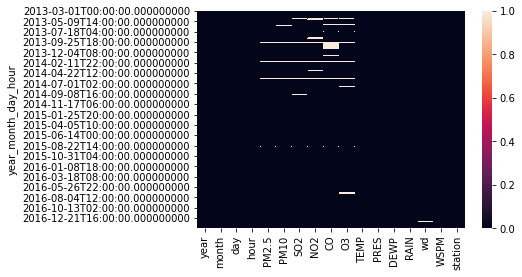

In [53]:
sns.heatmap(aq_df.isnull())

In [54]:
aq_df.nunique()

year         5
month       12
day         31
hour        24
PM2.5      486
PM10       554
SO2        327
NO2        636
CO         103
O3         792
TEMP       998
PRES       593
DEWP       602
RAIN       116
wd          16
WSPM        95
station      1
dtype: int64

In [55]:
pm = aq_df["PM2.5"]

In [56]:
pm

year_month_day_hour
2013-03-01 00:00:00     4.0
2013-03-01 01:00:00     7.0
2013-03-01 02:00:00     5.0
2013-03-01 03:00:00     6.0
2013-03-01 04:00:00     5.0
                       ... 
2017-02-28 19:00:00    11.0
2017-02-28 20:00:00    13.0
2017-02-28 21:00:00     9.0
2017-02-28 22:00:00    10.0
2017-02-28 23:00:00    13.0
Name: PM2.5, Length: 35064, dtype: float64

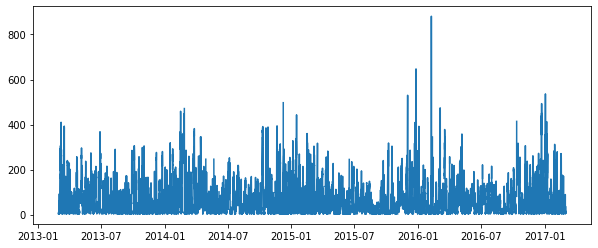

In [58]:
plt.figure(figsize=(10,4))
plt.plot(pm)

## Plotly Express

In [60]:
import plotly.express as px 

fig = px.line(aq_df,x = aq_df.index, y = "PM2.5", title="PM 2.5")
fig.update_xaxes(rangeslider_visible = True)
fig.show()

In [61]:
fig = px.line(aq_df,x = aq_df.index, y = "PM2.5", title="PM 2.5")

fig.update_xaxes(rangeslider_visible = True,
                rangeselector = dict(                    #range Selector dictionary for buttons
                buttons = list([                  
                    dict(count=1,label = '1y', step = 'year',stepmode = 'backward'),   #step = either month, year , anything
                    dict(count=2,label = '2y', step = 'year',stepmode = 'backward'),
                    dict(count=3,label = '3y', step = 'year',stepmode = 'backward'),
                    dict(step = 'all')
                ])))
fig.show()

In [62]:
df_2014 = aq_df.loc["2014"]

In [64]:
df_2015 = aq_df.loc["2015"]

In [65]:
df_2015

year month day hour  PM2.5   PM10   SO2   NO2      CO  \
year_month_day_hour                                                          
2015-01-01 00:00:00  2015     1   1    0    NaN    NaN   NaN   NaN     NaN   
2015-01-01 01:00:00  2015     1   1    1    NaN    NaN   NaN   NaN     NaN   
2015-01-01 02:00:00  2015     1   1    2    NaN    NaN   NaN   NaN     NaN   
2015-01-01 03:00:00  2015     1   1    3    NaN    NaN   NaN   NaN     NaN   
2015-01-01 04:00:00  2015     1   1    4    NaN    NaN   NaN   NaN     NaN   
...                   ...   ...  ..  ...    ...    ...   ...   ...     ...   
2015-12-31 19:00:00  2015    12  31   19   85.0   95.0  12.0  73.0  1200.0   
2015-12-31 20:00:00  2015    12  31   20    NaN  109.0  32.0  79.0  2900.0   
2015-12-31 21:00:00  2015    12  31   21   80.0  100.0  35.0  81.0  3200.0   
2015-12-31 22:00:00  2015    12  31   22   93.0   93.0  28.0  76.0  3500.0   
2015-12-31 23:00:00  2015    12  31   23   98.0   98.0  25.0  75.0  3600.0   

                      O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                      
2015-01-01 00:00:00  NaN  -4.0  1025.0 -23.7   0.0   NW   3.3  Dingling  
2015-01-01 01:00:00  NaN  -2.0  1022.0 -22.6   0.0  NNE   1.2  Dingling  
2015-01-01 02:00:00  NaN  -5.0  1022.0 -23.5   0.0  NNW   1.7  Dingling  
2015-01-01 03:00:00  NaN  -5.0  1023.0 -23.5   0.0    N   1.7  Dingling  
2015-01-01 04:00:00  NaN  -5.0  1024.0 -24.0   0.0   NE   1.8  Dingling  
...                  ...   ...     ...   ...   ...  ...   ...       ...  
2015-12-31 19:00:00  2.0  -0.6  1021.0  -9.5   0.0   NE   0.6  Dingling  
2015-12-31 20:00:00  2.0  -1.8  1021.2  -9.9   0.0   NW   1.1  Dingling  
2015-12-31 21:00:00  2.0  -1.6  1020.8  -9.7   0.0   NE   0.9  Dingling  
2015-12-31 22:00:00  2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3  Dingling  
2015-12-31 23:00:00  2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3  Dingling  

[8760 rows x 17 columns]

In [66]:
df_2014

year month day hour  PM2.5   PM10   SO2   NO2     CO  \
year_month_day_hour                                                         
2014-01-01 00:00:00  2014     1   1    0   27.0  104.0  12.0   9.0    NaN   
2014-01-01 01:00:00  2014     1   1    1   25.0   86.0  12.0   9.0  500.0   
2014-01-01 02:00:00  2014     1   1    2   27.0   85.0  14.0   9.0  400.0   
2014-01-01 03:00:00  2014     1   1    3   34.0   98.0  19.0  15.0  400.0   
2014-01-01 04:00:00  2014     1   1    4   32.0  102.0  18.0  15.0  400.0   
...                   ...   ...  ..  ...    ...    ...   ...   ...    ...   
2014-12-31 19:00:00  2014    12  31   19    7.0   37.0   2.0   2.0  300.0   
2014-12-31 20:00:00  2014    12  31   20    NaN    NaN   NaN   NaN    NaN   
2014-12-31 21:00:00  2014    12  31   21    NaN    NaN   NaN   NaN    NaN   
2014-12-31 22:00:00  2014    12  31   22    NaN    NaN   NaN   NaN    NaN   
2014-12-31 23:00:00  2014    12  31   23    NaN    NaN   NaN   NaN    NaN   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2014-01-01 00:00:00   NaN   6.8  1003.7 -15.9   0.0  WSW   5.2  Dingling  
2014-01-01 01:00:00  63.0   6.5  1003.6 -16.2   0.0    W   3.6  Dingling  
2014-01-01 02:00:00  63.0   6.4  1003.4 -15.6   0.0  WNW   5.3  Dingling  
2014-01-01 03:00:00  56.0   6.2  1002.9 -15.8   0.0  WNW   4.7  Dingling  
2014-01-01 04:00:00  33.0   6.1  1002.7 -15.2   0.0    W   3.5  Dingling  
...                   ...   ...     ...   ...   ...  ...   ...       ...  
2014-12-31 19:00:00  69.0  -2.3  1015.0 -24.8   0.0   NW   2.2  Dingling  
2014-12-31 20:00:00   NaN  -2.5  1014.0 -24.3   0.0  NNW   2.3  Dingling  
2014-12-31 21:00:00   NaN  -3.1  1012.0 -23.5   0.0   NW   1.4  Dingling  
2014-12-31 22:00:00   NaN  -3.0  1014.0 -23.4   0.0   NW   2.7  Dingling  
2014-12-31 23:00:00   NaN  -3.5  1012.0 -22.7   0.0    E   1.4  Dingling  

[8760 rows x 17 columns]

In [80]:
 t = pd.date_range(start = "1/1/2001",end = "01/01/2002", freq = "1H")[:-1]

In [81]:
t 

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 01:00:00',
               '2001-01-01 02:00:00', '2001-01-01 03:00:00',
               '2001-01-01 04:00:00', '2001-01-01 05:00:00',
               '2001-01-01 06:00:00', '2001-01-01 07:00:00',
               '2001-01-01 08:00:00', '2001-01-01 09:00:00',
               ...
               '2001-12-31 14:00:00', '2001-12-31 15:00:00',
               '2001-12-31 16:00:00', '2001-12-31 17:00:00',
               '2001-12-31 18:00:00', '2001-12-31 19:00:00',
               '2001-12-31 20:00:00', '2001-12-31 21:00:00',
               '2001-12-31 22:00:00', '2001-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [82]:
len(t)

8760

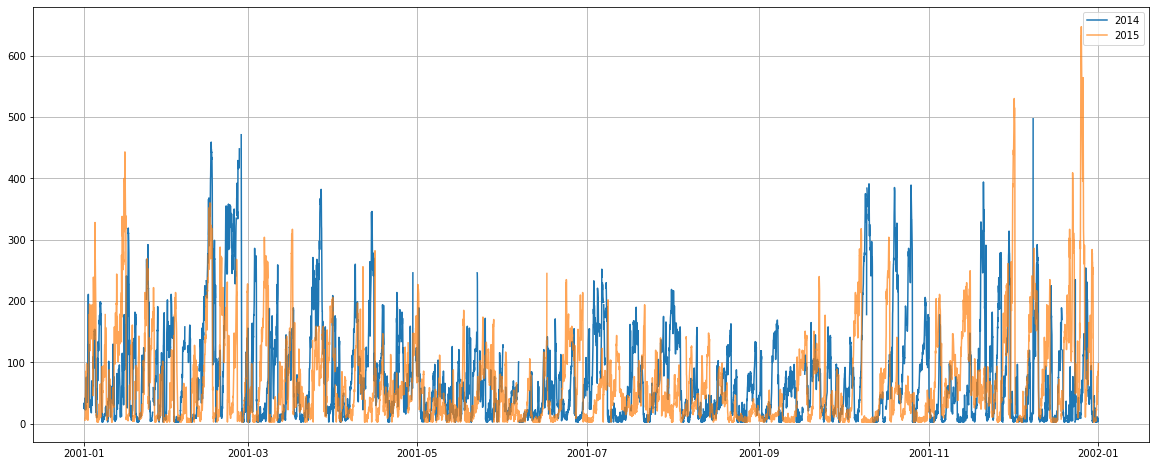

In [89]:
plt.figure(figsize=[20,8])
plt.plot(t,df_2014["PM2.5"],label=2014)
plt.plot(t,df_2015["PM2.5"],label=2015,alpha = 0.7)
plt.grid()
plt.legend()

In [92]:
aq_df["TEMP"]

year_month_day_hour
2013-03-01 00:00:00    -2.3
2013-03-01 01:00:00    -2.5
2013-03-01 02:00:00    -3.0
2013-03-01 03:00:00    -3.6
2013-03-01 04:00:00    -3.5
                       ... 
2017-02-28 19:00:00    11.7
2017-02-28 20:00:00    10.9
2017-02-28 21:00:00     9.5
2017-02-28 22:00:00     7.8
2017-02-28 23:00:00     7.0
Name: TEMP, Length: 35064, dtype: float64

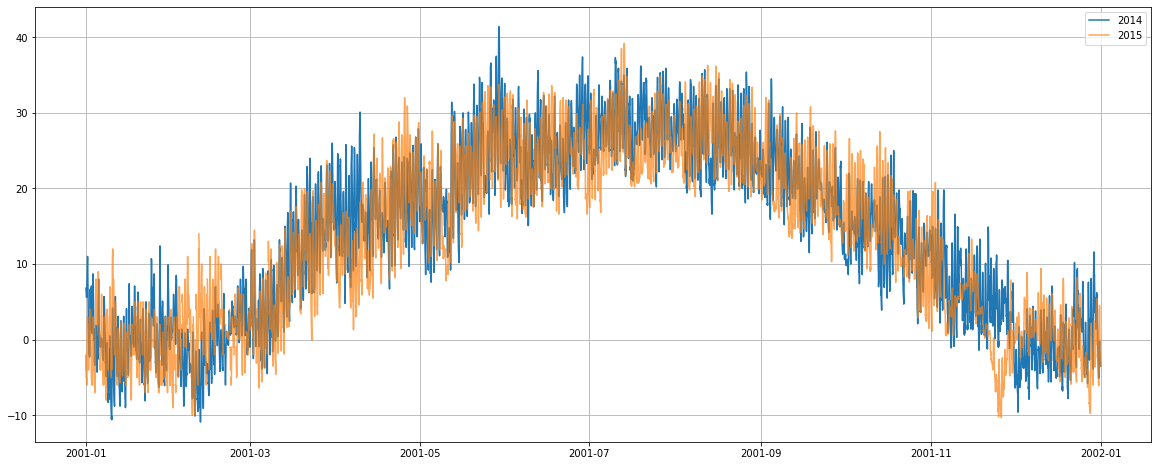

In [94]:
plt.figure(figsize=[20,8])
plt.plot(t,df_2014["TEMP"],label=2014)
plt.plot(t,df_2015["TEMP"],label=2015,alpha = 0.7)
plt.grid()
plt.legend()

In [98]:
aq_df.groupby("month").mean()[["PM2.5"]]

PM2.5
month           
1      73.156108
10     80.305925
11     69.901713
12     78.821441
2      78.147126
3      84.098038
4      64.755974
5      53.704803
6      56.471182
7      59.806038
8      43.490136
9      49.931039

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

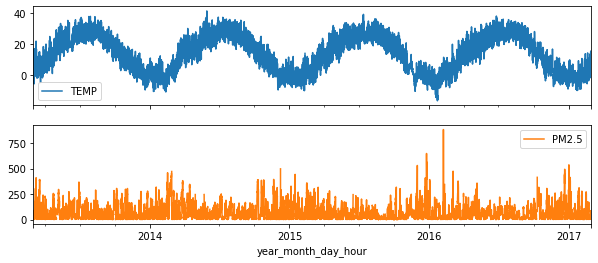

In [101]:
aq_df[["TEMP","PM2.5"]].plot(figsize=(10,4),subplots = True)

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

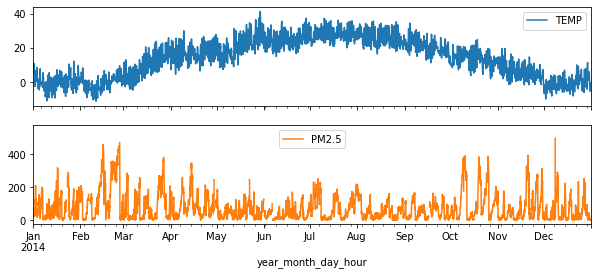

In [102]:
df_2014[["TEMP","PM2.5"]].plot(figsize=(10,4),subplots = True)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

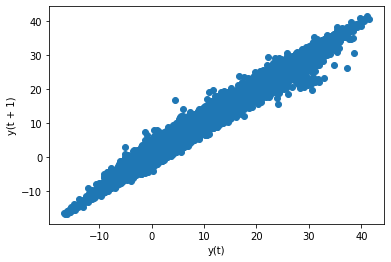

In [106]:
pd.plotting.lag_plot(aq_df["TEMP"],lag = 1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 10)'>

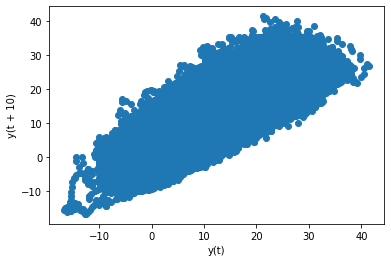

In [107]:
pd.plotting.lag_plot(aq_df["TEMP"],lag = 10)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 24)'>

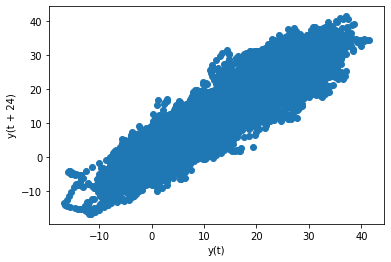

In [108]:
pd.plotting.lag_plot(aq_df["TEMP"],lag = 24)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 8640)'>

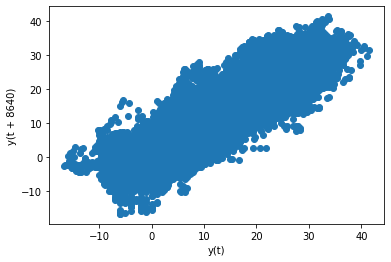

In [110]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=8640)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 4320)'>

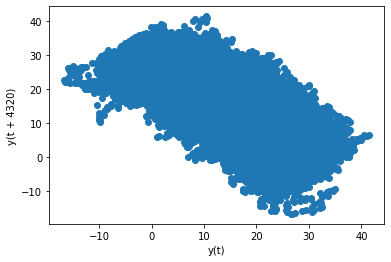

In [111]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=4320)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2150)'>

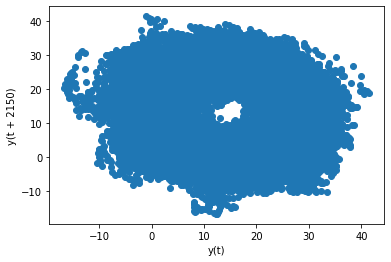

In [112]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=2150)

In [119]:
aq_df[['TEMP']].dropna()

TEMP
year_month_day_hour      
2013-03-01 00:00:00  -2.3
2013-03-01 01:00:00  -2.5
2013-03-01 02:00:00  -3.0
2013-03-01 03:00:00  -3.6
2013-03-01 04:00:00  -3.5
...                   ...
2017-02-28 19:00:00  11.7
2017-02-28 20:00:00  10.9
2017-02-28 21:00:00   9.5
2017-02-28 22:00:00   7.8
2017-02-28 23:00:00   7.0

[35011 rows x 1 columns]

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

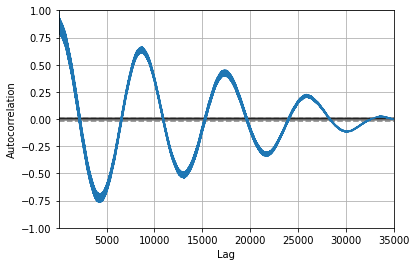

In [120]:
pd.plotting.autocorrelation_plot(aq_df[['TEMP']].dropna())